In [2]:
# Import modules
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import pandas as pd
import random as python_random
import os
import shutil
import glob

In [3]:
df_1 = pd.read_csv('hist_2D_final_1.csv')
df_1

,epoch,accuracy,dice_coefficient,loss,one_hot_io_u,one_hot_io_u_1,one_hot_io_u_2,one_hot_io_u_3,one_hot_mean_io_u,val_accuracy,val_dice_coefficient,val_loss,val_one_hot_io_u,val_one_hot_io_u_1,val_one_hot_io_u_2,val_one_hot_io_u_3,val_one_hot_mean_io_u
0,0,0.665371,0.299502,0.602067,0.243452,0.316035,0.092478,0.160406,0.203093,0.949960,0.331260,1.251952,0.692152,0.024326,0.000000,0.001202,0.179420
1,1,0.843202,0.344313,0.414906,0.244960,0.343289,0.109628,0.201535,0.224853,0.960891,0.379325,0.904382,0.785435,0.259279,0.069518,0.267986,0.345555
2,2,0.856362,0.356605,0.362104,0.271458,0.364406,0.130978,0.249051,0.253973,0.902427,0.365771,0.385619,0.573307,0.235643,0.191221,0.234669,0.308710
3,3,0.879983,0.365709,0.323323,0.302949,0.371582,0.166604,0.314250,0.288846,0.895866,0.376670,0.364347,0.554082,0.219299,0.240966,0.179935,0.298571
4,4,0.884910,0.371891,0.295026,0.314164,0.382999,0.177142,0.341528,0.303958,0.834791,0.365771,0.342769,0.432361,0.154014,0.203317,0.197134,0.246706
5,5,0.890445,0.376163,0.283061,0.325151,0.395730,0.192950,0.372552,0.321596,0.853657,0.375546,0.357124,0.465326,0.171224,0.145514,0.186797,0.242215
6,6,0.895986,0.381053,0.266249,0.336309,0.394079,0.203559,0.377585,0.327883,0.865271,0.381251,0.335565,0.482699,0.185228,0.179037,0.194750,0.260429
7,7,0.900167,0.384140,0.256771,0.339130,0.400228,0.213984,0.387013,0.335089,0.897975,0.392281,0.324201,0.558945,0.232652,0.193156,0.230139,0.303723
8,8,0.894791,0.385826,0.253232,0.337004,0.409575,0.201887,0.411894,0.340090,0.902195,0.397087,0.313009,0.564503,0.242420,0.242823,0.256447,0.326548
9,9,0.907907,0.389521,0.238406,0.355087,0.414026,0.229950,0.433370,0.358108,0.880134,0.391795,0.316834,0.511924,0.214593,0.173513,0.219486,0.279879


In [4]:
df_2 = pd.read_csv('hist_2D_final_2.csv')
df_2

,epoch,accuracy,dice_coefficient,loss,one_hot_io_u,one_hot_io_u_1,one_hot_io_u_2,one_hot_io_u_3,one_hot_mean_io_u,val_accuracy,val_dice_coefficient,val_loss,val_one_hot_io_u,val_one_hot_io_u_1,val_one_hot_io_u_2,val_one_hot_io_u_3,val_one_hot_mean_io_u
0,20,0.927813,0.407288,0.199145,0.384791,0.431318,0.276281,0.519633,0.403006,0.933234,0.415882,0.284132,0.660163,0.345356,0.277409,0.284305,0.391809
1,21,0.929219,0.408967,0.193714,0.388047,0.434709,0.285630,0.518373,0.406690,0.928066,0.413973,0.283535,0.645919,0.339415,0.259584,0.285303,0.382555
2,22,0.930838,0.410397,0.190970,0.386163,0.434696,0.278654,0.535515,0.408757,0.944102,0.420365,0.273723,0.707627,0.377103,0.333150,0.332662,0.437636
3,23,0.933365,0.412119,0.187159,0.392522,0.436209,0.292778,0.541629,0.415784,0.938023,0.419336,0.312525,0.688216,0.376014,0.241624,0.265447,0.392825
4,24,0.930340,0.411981,0.192501,0.388964,0.433679,0.278921,0.533170,0.408684,0.940402,0.420576,0.275280,0.692877,0.378098,0.294778,0.291341,0.414274
5,25,0.931885,0.412423,0.191721,0.387168,0.435880,0.279003,0.549371,0.412855,0.947216,0.426154,0.282809,0.720740,0.403143,0.322550,0.313933,0.440091
6,26,0.934495,0.413828,0.184836,0.393156,0.436438,0.294451,0.554671,0.419679,0.933289,0.417691,0.295311,0.668799,0.356306,0.283561,0.300574,0.402310
7,27,0.934881,0.414994,0.181079,0.398774,0.439062,0.303012,0.563551,0.426100,0.935808,0.420551,0.300204,0.682662,0.359017,0.229167,0.271774,0.385655
8,28,0.936637,0.416177,0.180660,0.401366,0.438623,0.304918,0.566898,0.427951,0.940326,0.423560,0.284561,0.694917,0.369654,0.301111,0.313395,0.419769
9,29,0.937984,0.416658,0.176255,0.404444,0.439191,0.313339,0.577849,0.433706,0.945179,0.423841,0.264468,0.714297,0.392782,0.292994,0.315302,0.428844


In [5]:
metrics = pd.concat([df_1, df_2], axis = 0, ignore_index= True)
metrics 

,epoch,accuracy,dice_coefficient,loss,one_hot_io_u,one_hot_io_u_1,one_hot_io_u_2,one_hot_io_u_3,one_hot_mean_io_u,val_accuracy,val_dice_coefficient,val_loss,val_one_hot_io_u,val_one_hot_io_u_1,val_one_hot_io_u_2,val_one_hot_io_u_3,val_one_hot_mean_io_u
0,0,0.665371,0.299502,0.602067,0.243452,0.316035,0.092478,0.160406,0.203093,0.949960,0.331260,1.251952,0.692152,0.024326,0.000000,0.001202,0.179420
1,1,0.843202,0.344313,0.414906,0.244960,0.343289,0.109628,0.201535,0.224853,0.960891,0.379325,0.904382,0.785435,0.259279,0.069518,0.267986,0.345555
2,2,0.856362,0.356605,0.362104,0.271458,0.364406,0.130978,0.249051,0.253973,0.902427,0.365771,0.385619,0.573307,0.235643,0.191221,0.234669,0.308710
3,3,0.879983,0.365709,0.323323,0.302949,0.371582,0.166604,0.314250,0.288846,0.895866,0.376670,0.364347,0.554082,0.219299,0.240966,0.179935,0.298571
4,4,0.884910,0.371891,0.295026,0.314164,0.382999,0.177142,0.341528,0.303958,0.834791,0.365771,0.342769,0.432361,0.154014,0.203317,0.197134,0.246706
5,5,0.890445,0.376163,0.283061,0.325151,0.395730,0.192950,0.372552,0.321596,0.853657,0.375546,0.357124,0.465326,0.171224,0.145514,0.186797,0.242215
6,6,0.895986,0.381053,0.266249,0.336309,0.394079,0.203559,0.377585,0.327883,0.865271,0.381251,0.335565,0.482699,0.185228,0.179037,0.194750,0.260429
7,7,0.900167,0.384140,0.256771,0.339130,0.400228,0.213984,0.387013,0.335089,0.897975,0.392281,0.324201,0.558945,0.232652,0.193156,0.230139,0.303723
8,8,0.894791,0.385826,0.253232,0.337004,0.409575,0.201887,0.411894,0.340090,0.902195,0.397087,0.313009,0.564503,0.242420,0.242823,0.256447,0.326548
9,9,0.907907,0.389521,0.238406,0.355087,0.414026,0.229950,0.433370,0.358108,0.880134,0.391795,0.316834,0.511924,0.214593,0.173513,0.219486,0.279879


In [6]:
metrics["epoch"] = metrics["epoch"] + 1

In [7]:
metrics

,epoch,accuracy,dice_coefficient,loss,one_hot_io_u,one_hot_io_u_1,one_hot_io_u_2,one_hot_io_u_3,one_hot_mean_io_u,val_accuracy,val_dice_coefficient,val_loss,val_one_hot_io_u,val_one_hot_io_u_1,val_one_hot_io_u_2,val_one_hot_io_u_3,val_one_hot_mean_io_u
0,1,0.665371,0.299502,0.602067,0.243452,0.316035,0.092478,0.160406,0.203093,0.949960,0.331260,1.251952,0.692152,0.024326,0.000000,0.001202,0.179420
1,2,0.843202,0.344313,0.414906,0.244960,0.343289,0.109628,0.201535,0.224853,0.960891,0.379325,0.904382,0.785435,0.259279,0.069518,0.267986,0.345555
2,3,0.856362,0.356605,0.362104,0.271458,0.364406,0.130978,0.249051,0.253973,0.902427,0.365771,0.385619,0.573307,0.235643,0.191221,0.234669,0.308710
3,4,0.879983,0.365709,0.323323,0.302949,0.371582,0.166604,0.314250,0.288846,0.895866,0.376670,0.364347,0.554082,0.219299,0.240966,0.179935,0.298571
4,5,0.884910,0.371891,0.295026,0.314164,0.382999,0.177142,0.341528,0.303958,0.834791,0.365771,0.342769,0.432361,0.154014,0.203317,0.197134,0.246706
5,6,0.890445,0.376163,0.283061,0.325151,0.395730,0.192950,0.372552,0.321596,0.853657,0.375546,0.357124,0.465326,0.171224,0.145514,0.186797,0.242215
6,7,0.895986,0.381053,0.266249,0.336309,0.394079,0.203559,0.377585,0.327883,0.865271,0.381251,0.335565,0.482699,0.185228,0.179037,0.194750,0.260429
7,8,0.900167,0.384140,0.256771,0.339130,0.400228,0.213984,0.387013,0.335089,0.897975,0.392281,0.324201,0.558945,0.232652,0.193156,0.230139,0.303723
8,9,0.894791,0.385826,0.253232,0.337004,0.409575,0.201887,0.411894,0.340090,0.902195,0.397087,0.313009,0.564503,0.242420,0.242823,0.256447,0.326548
9,10,0.907907,0.389521,0.238406,0.355087,0.414026,0.229950,0.433370,0.358108,0.880134,0.391795,0.316834,0.511924,0.214593,0.173513,0.219486,0.279879


In [8]:
metrics.columns.tolist()

['epoch',
 'accuracy',
 'dice_coefficient',
 'loss',
 'one_hot_io_u',
 'one_hot_io_u_1',
 'one_hot_io_u_2',
 'one_hot_io_u_3',
 'one_hot_mean_io_u',
 'val_accuracy',
 'val_dice_coefficient',
 'val_loss',
 'val_one_hot_io_u',
 'val_one_hot_io_u_1',
 'val_one_hot_io_u_2',
 'val_one_hot_io_u_3',
 'val_one_hot_mean_io_u']

In [9]:
new_order = ['epoch', 'loss', 'val_loss', 'accuracy', 'val_accuracy', 'dice_coefficient', 'val_dice_coefficient', 'one_hot_io_u', 'one_hot_io_u_1', 'one_hot_io_u_2', 'one_hot_io_u_3', 'one_hot_mean_io_u', 'val_one_hot_io_u', 'val_one_hot_io_u_1', 'val_one_hot_io_u_2', 'val_one_hot_io_u_3', 'val_one_hot_mean_io_u']

In [10]:
metrics = metrics[new_order]
metrics

,epoch,loss,val_loss,accuracy,val_accuracy,dice_coefficient,val_dice_coefficient,one_hot_io_u,one_hot_io_u_1,one_hot_io_u_2,one_hot_io_u_3,one_hot_mean_io_u,val_one_hot_io_u,val_one_hot_io_u_1,val_one_hot_io_u_2,val_one_hot_io_u_3,val_one_hot_mean_io_u
0,1,0.602067,1.251952,0.665371,0.949960,0.299502,0.331260,0.243452,0.316035,0.092478,0.160406,0.203093,0.692152,0.024326,0.000000,0.001202,0.179420
1,2,0.414906,0.904382,0.843202,0.960891,0.344313,0.379325,0.244960,0.343289,0.109628,0.201535,0.224853,0.785435,0.259279,0.069518,0.267986,0.345555
2,3,0.362104,0.385619,0.856362,0.902427,0.356605,0.365771,0.271458,0.364406,0.130978,0.249051,0.253973,0.573307,0.235643,0.191221,0.234669,0.308710
3,4,0.323323,0.364347,0.879983,0.895866,0.365709,0.376670,0.302949,0.371582,0.166604,0.314250,0.288846,0.554082,0.219299,0.240966,0.179935,0.298571
4,5,0.295026,0.342769,0.884910,0.834791,0.371891,0.365771,0.314164,0.382999,0.177142,0.341528,0.303958,0.432361,0.154014,0.203317,0.197134,0.246706
5,6,0.283061,0.357124,0.890445,0.853657,0.376163,0.375546,0.325151,0.395730,0.192950,0.372552,0.321596,0.465326,0.171224,0.145514,0.186797,0.242215
6,7,0.266249,0.335565,0.895986,0.865271,0.381053,0.381251,0.336309,0.394079,0.203559,0.377585,0.327883,0.482699,0.185228,0.179037,0.194750,0.260429
7,8,0.256771,0.324201,0.900167,0.897975,0.384140,0.392281,0.339130,0.400228,0.213984,0.387013,0.335089,0.558945,0.232652,0.193156,0.230139,0.303723
8,9,0.253232,0.313009,0.894791,0.902195,0.385826,0.397087,0.337004,0.409575,0.201887,0.411894,0.340090,0.564503,0.242420,0.242823,0.256447,0.326548
9,10,0.238406,0.316834,0.907907,0.880134,0.389521,0.391795,0.355087,0.414026,0.229950,0.433370,0.358108,0.511924,0.214593,0.173513,0.219486,0.279879


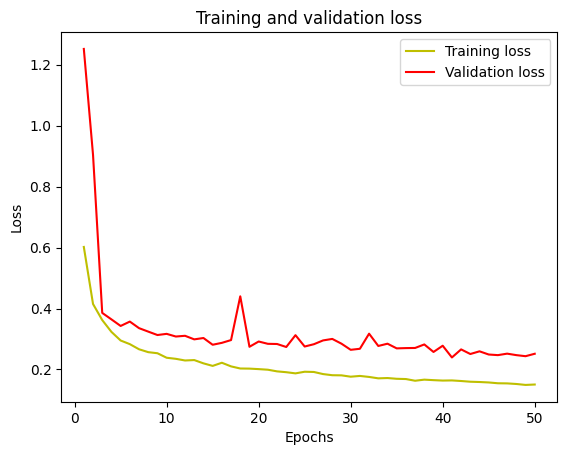

In [21]:
loss = metrics['loss']
val_loss = metrics['val_loss']
epochs = metrics['epoch']
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

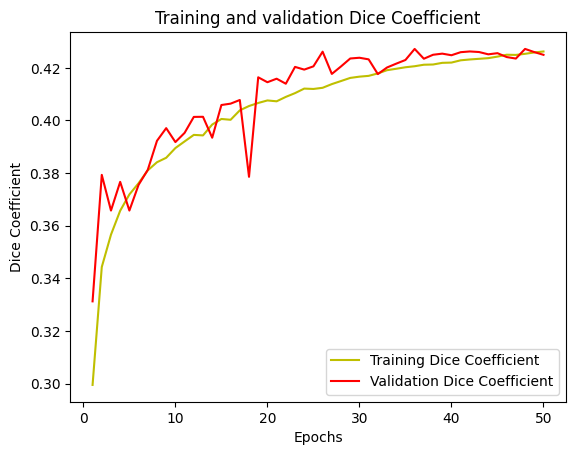

In [14]:
DSC = metrics['dice_coefficient']
val_DSC = metrics['val_dice_coefficient']
epochs = metrics['epoch']
plt.plot(epochs, DSC, 'y', label='Training Dice Coefficient')
plt.plot(epochs, val_DSC, 'r', label='Validation Dice Coefficient')
plt.title('Training and validation Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.show()

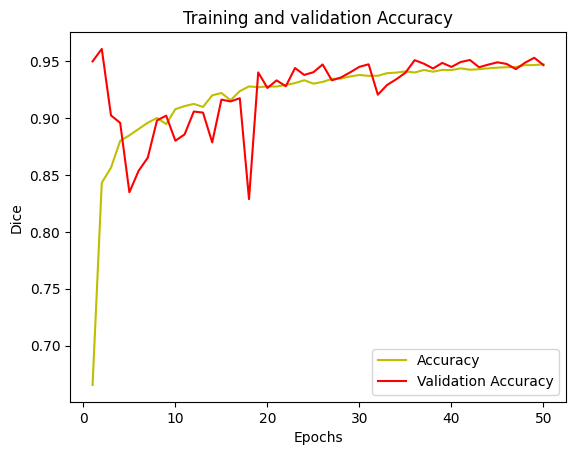

In [24]:
acc = metrics['accuracy']
val_acc = metrics['val_accuracy']

plt.plot(epochs, acc, 'y', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Dice')
plt.legend()
plt.show()

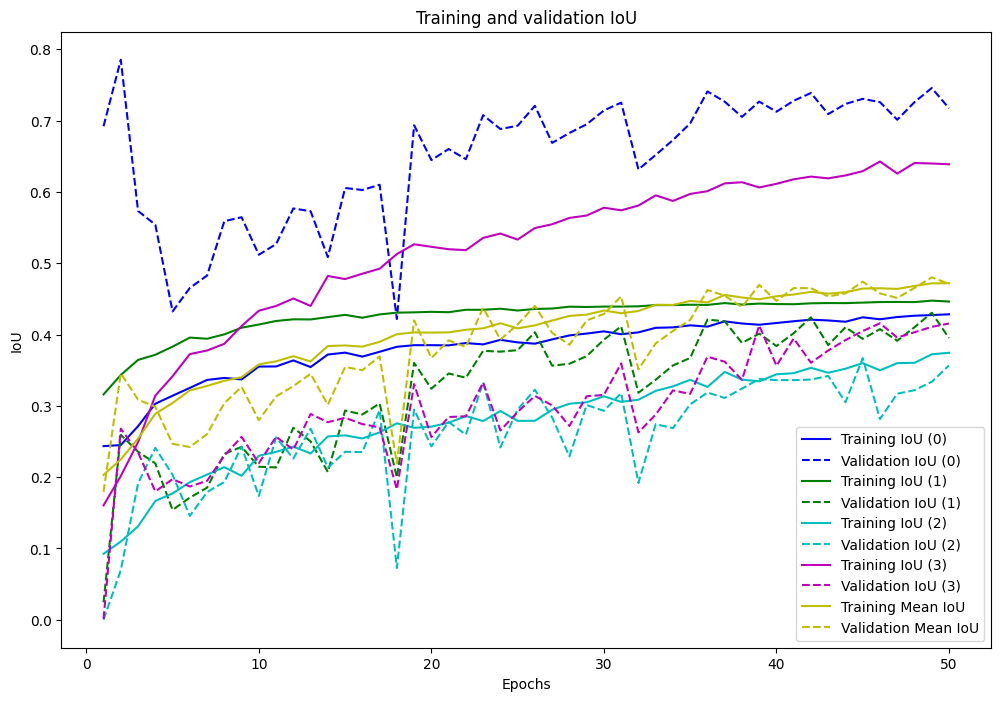

In [25]:
a1 = metrics['one_hot_io_u']
a2 = metrics['val_one_hot_io_u']
b1 = metrics['one_hot_io_u_1']
b2 = metrics['val_one_hot_io_u_1']
c1 = metrics['one_hot_io_u_2']
c2 = metrics['val_one_hot_io_u_2']
d1 = metrics['one_hot_io_u_3']
d2 = metrics['val_one_hot_io_u_3']
e1 = metrics['one_hot_mean_io_u']
e2 = metrics['val_one_hot_mean_io_u']

colors = ['b', 'g', 'c', 'm', 'y', 'k']
line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(12, 8))

plt.plot(epochs, a1, color=colors[0], linestyle=line_styles[0], label='Training IoU (0)')
plt.plot(epochs, a2, color=colors[0], linestyle=line_styles[1], label='Validation IoU (0)')
plt.plot(epochs, b1, color=colors[1], linestyle=line_styles[0], label='Training IoU (1)')
plt.plot(epochs, b2, color=colors[1], linestyle=line_styles[1], label='Validation IoU (1)')
plt.plot(epochs, c1, color=colors[2], linestyle=line_styles[0], label='Training IoU (2)')
plt.plot(epochs, c2, color=colors[2], linestyle=line_styles[1], label='Validation IoU (2)')
plt.plot(epochs, d1, color=colors[3], linestyle=line_styles[0], label='Training IoU (3)')
plt.plot(epochs, d2, color=colors[3], linestyle=line_styles[1], label='Validation IoU (3)')
plt.plot(epochs, e1, color=colors[4], linestyle=line_styles[0], label='Training Mean IoU')
plt.plot(epochs, e2, color=colors[4], linestyle=line_styles[1], label='Validation Mean IoU')

plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()